In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
shelter_data = pd.read_csv('../Animal_Shelter_Data.csv')
shelter_data.shape

(25008, 24)

In [5]:
shelter_data.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,K22-043412,TRUCK,A396382,...,FIELD,RETURN TO OWNER,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.43807, -122.71247)",1
1,NaN,OTHER,PIGEON,GRAY/WHITE,Unknown,SMALL,NaN,K23-044095,TRUCK,A416206,...,FIELD,EUTHANIZE,INJ SEVERE,UNKNOWN,HEALTHY,SANTA ROSA,NaN,NaN,NaN,1
2,MAX,DOG,BORDER COLLIE,BLACK/TRICOLOR,Neutered,MED,03/10/2020,K23-044090,DS80,A399488,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95472.0,"95472(38.40179, -122.82512)",1
3,NaN,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,06/26/2011,K22-043405,VET,A414520,...,FIELD,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,SANTA ROSA,95403.0,"95403(38.51311, -122.75502)",1
4,PUDGY,DOG,CHIHUAHUA SH/SCHIPPERKE,TAN,Neutered,MED,07/20/2013,K23-043813,DA27,A415428,...,OVER THE COUNTER,TRANSFER,MUTTVILLE,UNKNOWN,HEALTHY,SANTA ROSA,OUT OF COUNTY,94103.0,"94103(37.77672, -122.40779)",1


In [96]:
shelter_data.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date Of Birth',
       'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Date',
       'Outcome Date', 'Days in Shelter', 'Intake Type', 'Intake Subtype',
       'Outcome Type', 'Outcome Subtype', 'Intake Condition',
       'Outcome Condition', 'Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Location', 'Count', 'Intake Year', 'Adopted'],
      dtype='object')

In [122]:
shelter_data.dropna(subset=['Size'], inplace=True)
shelter_data.isnull().sum()

Name                    6567
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                       0
Date Of Birth           6206
Impound Number             0
Kennel Number             12
Animal ID                  0
Intake Date                0
Outcome Date             159
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             165
Outcome Subtype          482
Intake Condition           0
Outcome Condition        508
Intake Jurisdiction        0
Outcome Jurisdiction    3508
Outcome Zip Code        3565
Location                3565
Count                      0
dtype: int64

In [126]:
shelter_data.rename(columns={'Intake Subtype': 'Intake_Subtype',
                            'Intake Type': 'Intake_Type',
                            'Intake Condition': 'Intake_Condition'}, inplace=True)

### Explore the Number of Animals in the Shelter by Type

In [102]:
shelter_data.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date Of Birth',
       'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Date',
       'Outcome Date', 'Days in Shelter', 'Intake_Type', 'Intake_Subtype',
       'Outcome Type', 'Outcome Subtype', 'Intake_Condition',
       'Outcome Condition', 'Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Location', 'Count', 'Intake Year', 'Adopted'],
      dtype='object')

In [103]:
shelter_data.groupby('Intake_Type')['Type'].value_counts()

Intake_Type      Type 
ADOPTION RETURN  DOG        289
                 CAT        116
                 OTHER        4
BORN HERE        CAT         16
                 OTHER        1
CONFISCATE       DOG       1460
                 CAT        245
                 OTHER      197
OS APPT          DOG          1
OWNER SURRENDER  CAT       1583
                 DOG       1399
                 OTHER      143
QUARANTINE       DOG        422
                 OTHER      277
                 CAT        117
STRAY            DOG      10196
                 CAT       6598
                 OTHER     1409
TRANSFER         DOG        244
                 CAT        159
                 OTHER       12
Name: Type, dtype: int64

### EDA: What are the Top Cat Breeds in the Shelter?

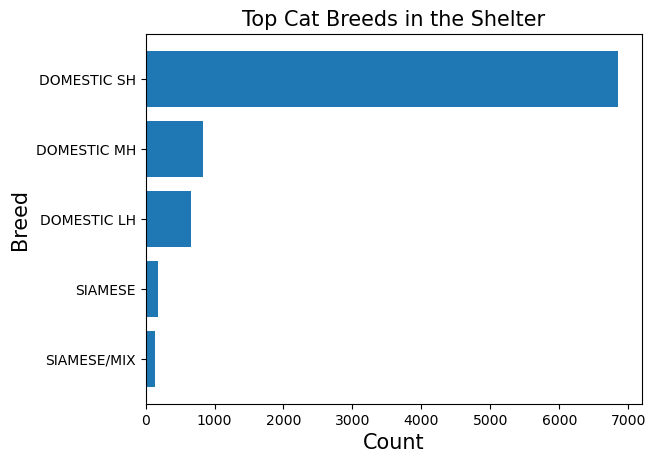

In [104]:
cat_data = shelter_data[shelter_data['Type'] == 'CAT']
cat_breed_counts = cat_data['Breed'].value_counts(ascending=True).tail(5)
plt.barh(cat_breed_counts.index, cat_breed_counts)
plt.title('Top Cat Breeds in the Shelter', size=15)
plt.xlabel('Count', size=15)
plt.ylabel('Breed', size=15)
plt.show()

### EDA: What are the Top Dog Breeds in the Shelter?

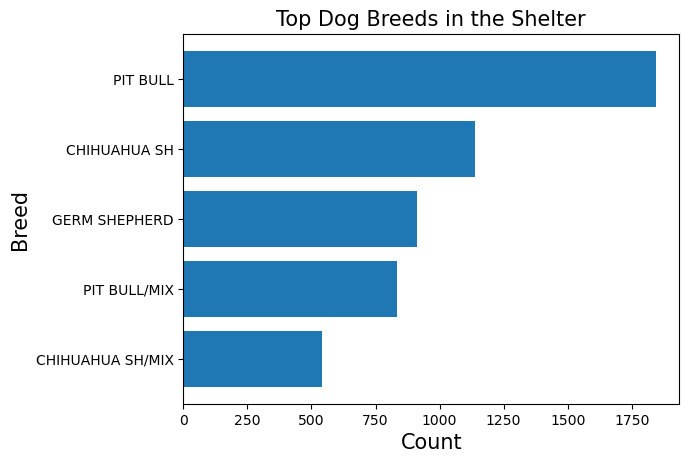

In [105]:
dog_data = shelter_data[shelter_data['Type'] == 'DOG']
dog_breed_counts = dog_data['Breed'].value_counts(ascending=True).tail(5)
plt.barh(dog_breed_counts.index, dog_breed_counts)
plt.title('Top Dog Breeds in the Shelter', size=15)
plt.xlabel('Count', size=15)
plt.ylabel('Breed', size=15)
plt.show()

In [106]:
shelter_data.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date Of Birth',
       'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Date',
       'Outcome Date', 'Days in Shelter', 'Intake_Type', 'Intake_Subtype',
       'Outcome Type', 'Outcome Subtype', 'Intake_Condition',
       'Outcome Condition', 'Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Location', 'Count', 'Intake Year', 'Adopted'],
      dtype='object')

### Trend line: which year has the most number of animal intakes?

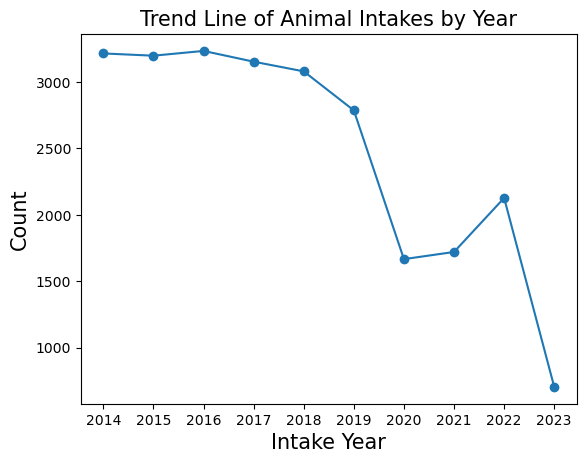

In [107]:
shelter_data['Intake Year'] = shelter_data['Intake Date'].apply(lambda x: x[-4:])

# Filter the data to only include records from the year 2014 and later.
shelter_data = shelter_data[shelter_data['Intake Year'] != '2013']
intake_counts = shelter_data.groupby('Intake Year').size()
intake_counts.plot(kind='line', title='Animal Intakes by Year')
plt.scatter(x=intake_counts.index, y=intake_counts)
plt.xticks(np.arange(len(intake_counts)), intake_counts.index)
plt.xlabel('Intake Year', size=15)
plt.ylabel('Count', size=15)
plt.title('Trend Line of Animal Intakes by Year', size=15)
plt.show()

# Predict whether an Animal is adopted eventually

In [127]:
# Create a new column named Adopted, and assign a value of 0 or 1 
# to indicate whether each animal has been adopted or not.
shelter_data['Adopted'] = (shelter_data['Outcome Type'] == 'ADOPTION').astype(int)

from sklearn.model_selection import train_test_split
#Split the data into test and train
shelter_train, shelter_test = train_test_split(shelter_data, test_size=0.3, random_state=159)
shelter_train.shape, shelter_test.shape

((17481, 25), (7492, 25))

In [128]:
shelter_train.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date Of Birth',
       'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Date',
       'Outcome Date', 'Days in Shelter', 'Intake_Type', 'Intake_Subtype',
       'Outcome Type', 'Outcome Subtype', 'Intake_Condition',
       'Outcome Condition', 'Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Location', 'Count', 'Adopted'],
      dtype='object')

In [134]:
shelter_train[['Type', 'Sex', 'Size', 'Intake_Type', 'Intake_Condition']]

,Type,Sex,Size,Intake_Type,Intake_Condition
19589,DOG,Neutered,LARGE,STRAY,UNKNOWN
15621,CAT,Unknown,KITTN,STRAY,UNTREATABLE
17950,CAT,Spayed,SMALL,QUARANTINE,UNTREATABLE
19344,DOG,Neutered,MED,STRAY,UNKNOWN
22262,OTHER,Unknown,SMALL,QUARANTINE,UNTREATABLE
...,...,...,...,...,...
9882,DOG,Male,MED,STRAY,UNKNOWN
13222,DOG,Neutered,LARGE,STRAY,HEALTHY
16642,DOG,Neutered,LARGE,STRAY,TREATABLE/MANAGEABLE
22397,CAT,Male,SMALL,OWNER SURRENDER,UNKNOWN


In [135]:
import statsmodels.formula.api as smf
logreg = smf.logit(formula = 'Adopted ~ Type + Sex + Size + Intake_Type + Intake_Condition',
                       data = shelter_train).fit()
print(logreg.summary())

         Current function value: 0.357273
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Adopted   No. Observations:                17481
Model:                          Logit   Df Residuals:                    17457
Method:                           MLE   Df Model:                           23
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.4094
Time:                        23:26:46   Log-Likelihood:                -6245.5
converged:                      False   LL-Null:                       -10575.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.2155      0.201     -1.072      0.284

/srv/conda/envs/notebook/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [141]:
# Predicting the probability of adopted
y_prob = logreg.predict(shelter_test)

# Predicting the label: 0 or 1?
y_pred = pd.Series([1 if x > 1/2 else 0 for x in y_prob], index=y_prob.index)

from sklearn.metrics import confusion_matrix
y_test = shelter_test['Adopted']
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[4820  460]
 [ 809 1403]]


In [143]:
TN, FP, FN, TP = cm.ravel()

# What is the Accuracy?
acc= (TN + TP) / sum(cm.ravel())
print('Accuracy is: %.4f' %acc)


# What is the True Positive Rate ?
TPR_logit = TP/(TP+FN)
print('TPR is: %.4f' % TPR_logit)

# What is the False Positive rate ?
FPR_logit = FP/(FP+TN)
print('FPR is: %.4f' % FPR_logit)

Accuracy is: 0.8306
TPR is: 0.6343
FPR is: 0.0871
